# Final Code


# Importing Libraries

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import matplotlib.pyplot as plt


# Load the dataset

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Normalize the dataset

In [ ]:
# make sure that the data is all the right shape
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [ ]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

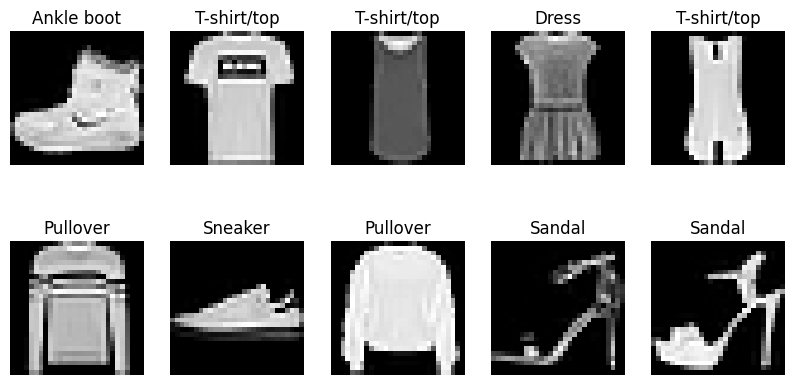

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Class names for better understanding
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display first 10 images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

plt.show()

In [ ]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


# Model 1

In [ ]:
# Create, compile and fit the model with the original MNIST data
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5964 - loss: 1.0876 - val_accuracy: 0.7927 - val_loss: 0.5703
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8160 - loss: 0.5178 - val_accuracy: 0.8277 - val_loss: 0.4937
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8409 - loss: 0.4605 - val_accuracy: 0.8330 - val_loss: 0.4723
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8478 - loss: 0.4389 - val_accuracy: 0.8354 - val_loss: 0.4615
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8507 - loss: 0.4321 - val_accuracy: 0.8359 - val_loss: 0.4627
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8557 - loss: 0.4169 - val_accuracy: 0.8454 - val_loss: 0.4436
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8545 - loss: 0.4144 - val_accuracy: 0.8438 - val_loss: 0.4463
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8579 - loss: 0.4066 - 

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.62%


## Accuracy and Loss Plot

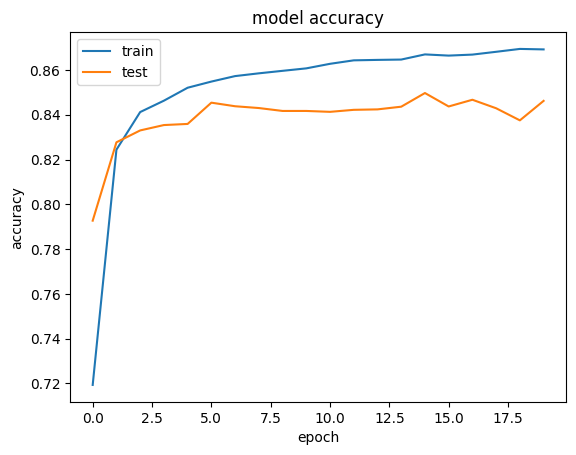

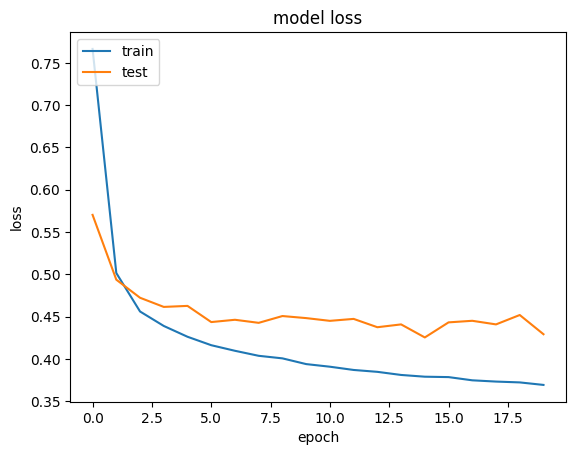

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Clear keras Sessions

In [ ]:
keras.backend.clear_session()

# Model 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input (28x28 images)
    Dense(units=192, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  =
    Dense(units=96, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7443 - loss: 0.7372 - val_accuracy: 0.8412 - val_loss: 0.4401
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8335 - loss: 0.4673 - val_accuracy: 0.8545 - val_loss: 0.4074
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8448 - loss: 0.4282 - val_accuracy: 0.8475 - val_loss: 0.4124
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8490 - loss: 0.4116 - val_accuracy: 0.8603 - val_loss: 0.3821
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8581 - loss: 0.3875 - val_accuracy: 0.8603 - val_loss: 0.3863
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8622 - loss: 0.3776 - val_accuracy: 0.8654 - val_loss: 0.3719
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8656 - loss: 0.3721 - val_accuracy: 0.8673 - val_loss: 0.3663
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8635 - loss: 0

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.89%


## Accuracy and loss Plot

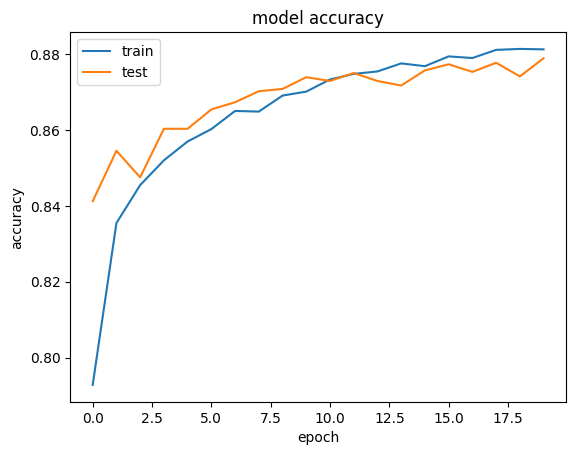

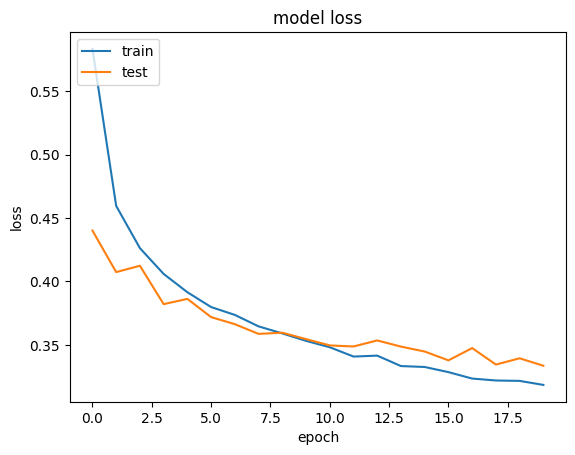

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Clear Keras Session

In [ ]:
keras.backend.clear_session()

# Model 3

In [ ]:
# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=256, activation='relu'),
    Dropout(0.3),
    Dense(units=128, activation='relu'),
    Dropout(0.15),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')])
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6658 - loss: 0.9633 - val_accuracy: 0.8321 - val_loss: 0.4638
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8397 - loss: 0.4584 - val_accuracy: 0.8538 - val_loss: 0.4084
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8565 - loss: 0.4004 - val_accuracy: 0.8564 - val_loss: 0.3974
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8631 - loss: 0.3776 - val_accuracy: 0.8643 - val_loss: 0.3760
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8730 - loss: 0.3479 - val_accuracy: 0.8651 - val_loss: 0.3642
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8768 - loss: 0.3358 - val_accuracy: 0.8749 - val_loss: 0.3467
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8804 - loss: 0.3247 - val_accuracy: 0.8767 - val_loss: 0.3389
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8823 - loss: 0.3181 - val_accuracy

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.76%


## Accuracy and Loss Plot

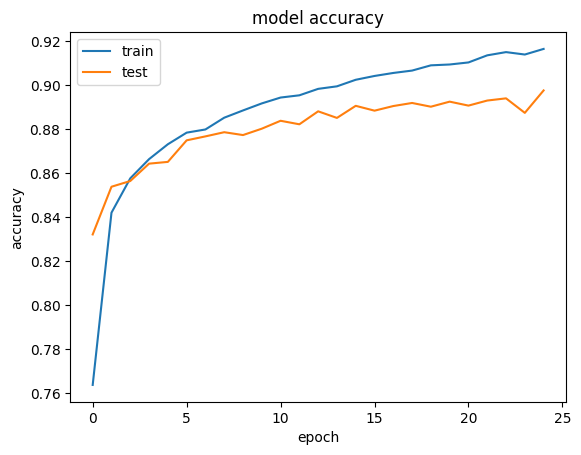

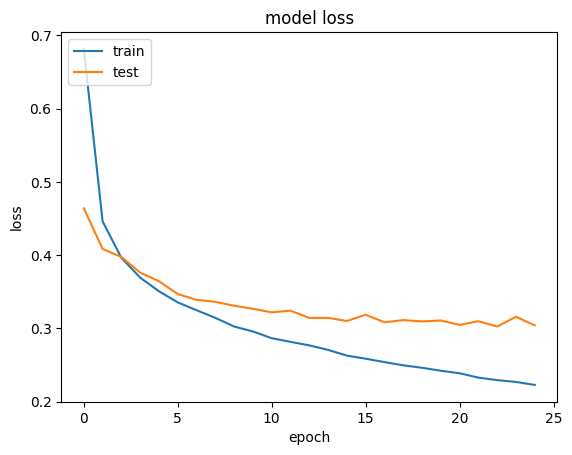

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Clear Keras Sessions

In [ ]:
keras.backend.clear_session()

# Model 4

In [ ]:
# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')])
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6300 - loss: 1.1054 - val_accuracy: 0.8275 - val_loss: 0.4837
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8157 - loss: 0.5143 - val_accuracy: 0.8495 - val_loss: 0.4213
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8385 - loss: 0.4550 - val_accuracy: 0.8586 - val_loss: 0.4003
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8508 - loss: 0.4163 - val_accuracy: 0.8621 - val_loss: 0.3834
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8580 - loss: 0.3937 - val_accuracy: 0.8649 - val_loss: 0.3703
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8655 - loss: 0.3760 - val_accuracy: 0.8640 - val_loss: 0.3664
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8692 - loss: 0.3572 - val_accuracy: 0.8701 - val_loss: 0.3584
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8742 - loss: 0.3422 - val_accuracy:

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.10%


## Accuracy and Loss Plot

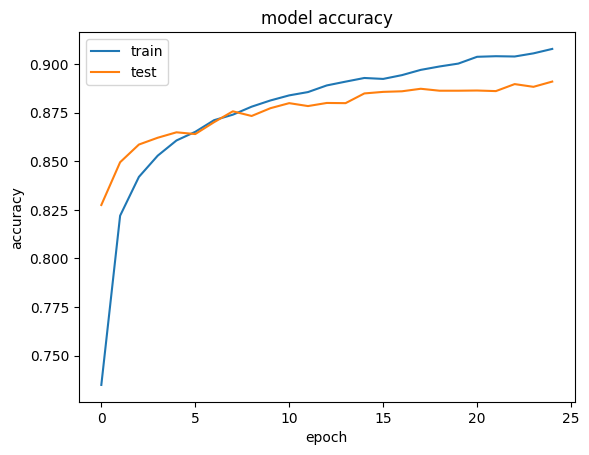

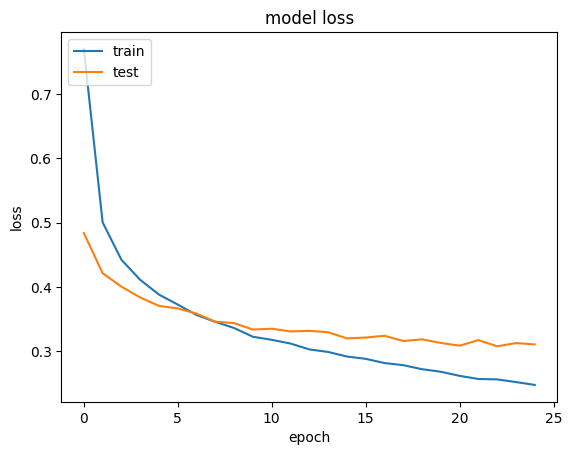

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Clear Keras Session

In [ ]:
keras.backend.clear_session()

# Model 5

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=192, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=96, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')])
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7128 - loss: 0.8311 - val_accuracy: 0.8412 - val_loss: 0.4340
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8345 - loss: 0.4660 - val_accuracy: 0.8430 - val_loss: 0.4278
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8462 - loss: 0.4233 - val_accuracy: 0.8527 - val_loss: 0.3972
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8517 - loss: 0.4131 - val_accuracy: 0.8602 - val_loss: 0.3782
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8569 - loss: 0.3905 - val_accuracy: 0.8618 - val_loss: 0.3793
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8652 - loss: 0.3675 - val_accuracy: 0.8589 - val_loss: 0.3845
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8671 - loss: 0.3646 - val_accuracy: 0.8625 - val_loss: 0.3665
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8698 - loss: 0

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.20%


## Accuracy and Loss Plot


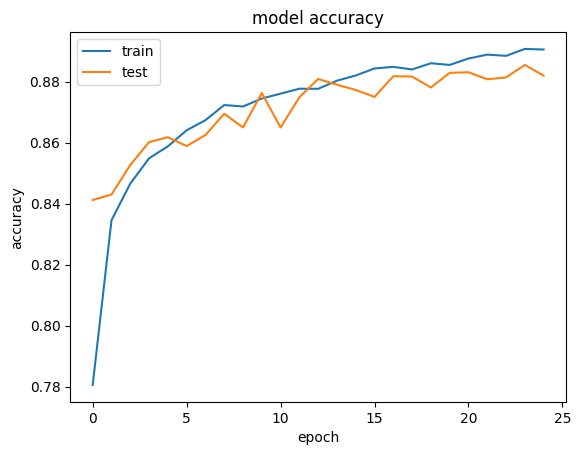

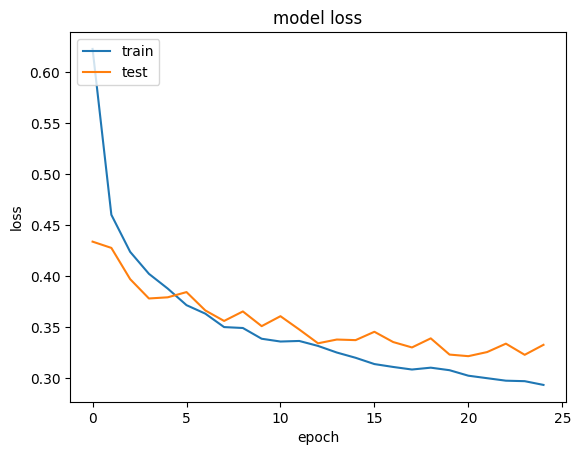

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()